[3.73835572e+09 2.00000000e+00 6.00035400e+03]
sum_error**2 8.877384160175406e-06
popt: [3.73835572e+09 2.00000000e+00 6.00035400e+03]
系数A: 3738355724.8159237
系数n: 1.9999999999999691
系数EA: 6000.3539978104145
系数协方差: [[ 1.41837667e+21 -5.32497001e+10  2.42925946e+13]
 [-5.32497001e+10  1.99915963e+00 -9.11949991e+02]
 [ 2.42925946e+13 -9.11949991e+02  4.16225639e+05]]
参数标准差: [3.76613419e+10 1.41391642e+00 6.45155515e+02]
RSE: 0.999990605934142
RSE2: 0.999990605934142
std: 0.0013324690518631702
系数yvals: [ 5.84052103  8.26199903  9.75877937 10.78578207 11.54013295 12.12145981
 12.58569828 12.96675999 13.28644724 13.55944259 13.796013   14.00356482
 14.18758272 14.3522202  14.50068398 14.63549195 14.75865065 14.8717803
 14.97620463 15.07301661 15.16312733 15.24730285 15.32619239]


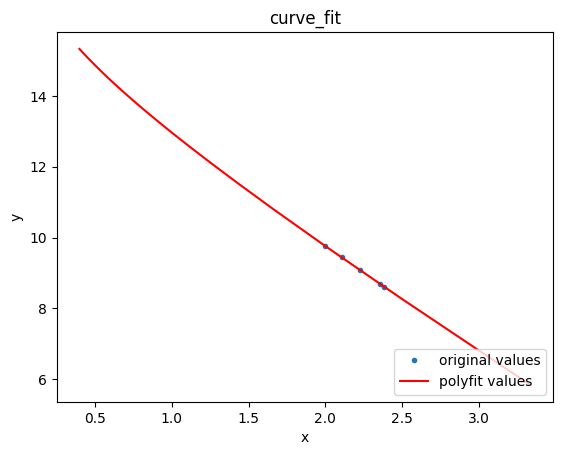

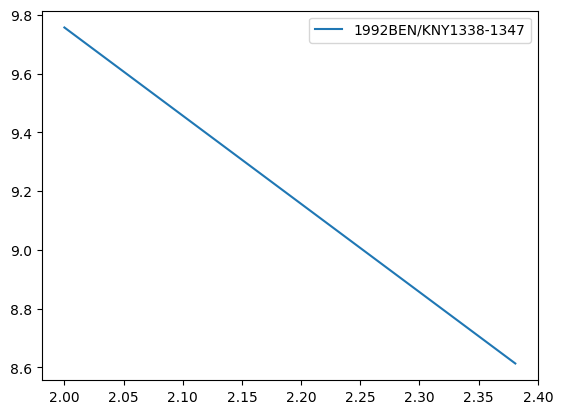

want to find  CH3CO(+M)<=>CH3+CO(+M)
TT find it  CH3CO(+M)<=>CH3+CO(+M)                                       +1.0700000E+012 +6.3000000E-001 +1.6900000E+004   !\AUTHOR: !\REF:J. PHYS. CHEM. A 2006, 110, 5772-5781 !\COMMENT: 

 CH3CO( M) CH3 CO(
hen find it  CH3CO(+M)=CO+CH3(+M)


In [1]:
from Utils.DataConvert_thridbody import ConvertData
from Utils.fit import Fit
from Utils.FindReaction import FindReaction
from Utils.Format import Format
from Utils.GetFileDir import GetFileDir
from Utils.GetReactionNum import GetReactionNum
import math

reactionnum = GetReactionNum()
excelname = GetFileDir(reactionnum,'forwardexcel')
outname = GetFileDir(reactionnum,'forwardtxt')

#转换web excel数据到txt文件
ConvertData(excelname, outname, needorder=2, reactiontype='thridbody')

#拟合数据
A,n,EAR = Fit(outname,reactionnum)
K0 = 0
#把拟合的数据写入文件
fd = open(outname,'a+')
fitoneLine = Format('fit','fit',300,2500,A,n,EAR,K0)
fd.write(fitoneLine) 

#把TT和henrry数据写入文件,根据excel的名字来找到反应
ttdata,hendata = FindReaction(excelname,needtype='LOW',henryname='CH3CO(+M)=CO+CH3(+M)',ttname='CH3CO(+M)<=>CH3+CO(+M)')
A = float(ttdata[0])
n = float(ttdata[1])
EA = float(ttdata[2])
EAR = EA/1.987
K0 = 0
ttoneLine = Format('Compare','taotao',300,2500,A,n,EAR,K0)
fd.write(ttoneLine) 

#有可能找不到henry的数据
if(len(hendata) != 0):
    A = float(hendata[0])
    n = float(hendata[1])
    EA = float(hendata[2])
    EAR = EA/1.987
    K0 = 0
    henoneLine = Format('0','henry',300,2500,A,n,EAR,K0)
    fd.write(henoneLine)
fd.close()

